# **Problem Statement**: 
Given the Board Game reviews, the below snippets of code attempts to predict the rating of the review. 

Test and Train data are divided in the ratio of 3:7. 

30% of the entire data belongs to test and 70% of data belongs to train.

# **Challenges Faced**

*   Size of the data
*   NULL values
*   RAM and hardware limitations
*   Execution time limits
*   Distribution of data
*   Continuous values

# **How did I overcome challenges?**
*   The size of the data was too large to process in reasonable time. To overcome this, whenever I have used sklearn predefined functions, I let the parameters have default values. For custon functions, I have taken only some part of the data.
*   This is a very classic text classification problem. Comments have null values that were affecting the input of the classifiers. I have removed all the null values because there of no importance. While vectorizing the data, I have removed extra white spaces.
*   Due to limited RAM, I have grouped my code into blocks that are dependent. Example: For ensemble methods, I have taken voting from 3 different classifiers and made sure that all the 3 classifiers and ensemble are ran together. Remaining snippets of code are independent of each other, thus running them in different sessions did not affect
*   Considering the size of the data, the execution time of each classifier is reasonably high. To overcome this, I have made used of pipeline functions in sklearn instead of executing all the elements separately.
*   Distribution of values for different class labels(Rating values) is very random and not uniform. This was the main reason affecting the accuracy. This was one challenge that taught me how real world data is. I have tried different kinds of models to observe what fits better.
*   The rating column in the data have continous values. For classification, continuous values are difficult to deal. It is almost impossible to classify in continuous values. To overcome this, I have converted it into integers thus obtaining discret values for rating.

# **How to choose the right ratio for train and test?**
unfortunately, there are no clear rules about what ratio to use. Personally I like 70-30, but this is a subjective choice. The tradeoffs are as follows:


*   More training data is nice because it means your model sees more examples and thus hopefully finds a better solution. If you have a tiny training data set your model won’t be able to learn general principles and will have bad validation / test set performance (in other words, it won’t work.)
*   More validation data is nice because it helps you make a better decision about which model is “The Best.” If you don’t have enough validation data, then there will be a lot of noise in your estimate of which model is “The Best” and you might not make a good choice.


*   More test data is nice because it gives you a better sense of how well your model generalizes to unseen data. If you don’t have enough test data, your final assessment of the model’s generalization ability might not be accurate.
(Read More on: https://glassboxmedicine.com/2019/09/15/best-use-of-train-val-test-splits-with-tips-for-medical-data/)

# **What Have I learnt from this exercise?**
My main Objective was to apply all the concepts learned in CSE5334 on the given problem and find which better suits the problem statement.I have also learnt drawbacks of certain models on the given data.
Following are the concepts used in this exercise:


*   Multinomial Naive Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html)
*   Multinomial NB using tfidf
*   Logistic Regression and hyper parameter tuning (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   Linear SVM (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
*   Hyper parameter tuning with Grid Search
*   Stemming (https://www.guru99.com/stemming-lemmatization-python-nltk.html)
*   Deep Learning using word2vec
*   Voting ensemble classifier (https://scikit-learn.org/stable/modules/ensemble.html)

Error and accuracy measurements used:
*   Accuracy score of the model (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   Mean Square Error (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
*   Mean absolute Error (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
*   Frequency Tables / cross tables of features (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)
*   Confusion Matrix (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)












**Pre-Req:**
This entire code was developed on google colab and cvs file should be present in google drive. Name of the text file should be "bgg-13m-reviews.csv"
 

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# **Google drive authentication:**

*   Save file in any folder of your Google Drive
*   Get shareable link of your file and save it in a "link" variable
*   Run the following code and copy authorization code and paste in the text box that appears
*   Running the next code cell fetches the file from the link and loads into the dataframe

Ref(https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/open?id=13jK9-sEAkIoqg2_9odAukk9q_WXMoQDs'
fluff, id = link.split('=')
print (id)

13jK9-sEAkIoqg2_9odAukk9q_WXMoQDs


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bgg-13m-reviews.csv')  
data = pd.read_csv('bgg-13m-reviews.csv')

# **Data Columns**
Given data contains the following coloums as displayed in the output
*   User -- text
*   Rating -- Float
*   Comment -- text
*   ID -- number
*   Name -- text

User, Name or ID cannot be selected as features for our model as they do not contribute to the rating for a game.
Comment is user text given for a game. This is a main component for our model. 
Rating is numerical number given for the text review. We consider this as labels and train our model to predict correct labes for the test data

In [8]:
data.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


# **Dropping NA rows**
As seen in the above output, comment have NaN as its values. Comment is the most important feature in our model. The rows with NaN have no value in our process and should be removed. 
One positive side of this is that the data size is reduced and becomes a little more manageable

In [9]:
print('Number of rows with NA values',len(data['comment']))
data = data.dropna(how='any',axis=0)
print('Number of rows without NA values',len(data['comment']))

Number of rows with NA values 13170073
Number of rows without NA values 2637756


# **Observing the Data**
It is very important to understand how our data is to choose what models to use. As it is already clear that we are dealing with text data, it is important to see what is actually usefull  in it.

Most of the text data by real time users contains information like punctuation and stop words that are not really useful in the process of our analysis.

Below output shows the number of stopwords, numerics and uppercase letters we have have in each review.

In [10]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
data['stopwords'] = data['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
data['numerics'] = data['comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data['upper'] = data['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,user,rating,comment,ID,name,stopwords,numerics,upper
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan,5,0,0
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan,6,0,2
7,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan,4,0,0
11,11,daredevil,10.0,This is probably the best game I ever played. ...,13,Catan,5,0,1
16,16,hurkle,10.0,Fantastic game. Got me hooked on games all ove...,13,Catan,4,0,0


# **Cleaning the text**
Text is just a sequence of words, or more precisely, a sequence of characters. But when we usually deal with language modelling, or natural language processing, we are more concerned about the words as a whole, instead of just worrying about character-level depth of our text data. One reason behind that is, that in the language models, individual characters don’t have a lot of “context”. Characters like ‘d’, ‘r’, ‘a’, ‘e’ don’t hold any context individually, but when rearranged in the form of a word, they might generate the word “read”, which might explain some activity you’re probably doing right now

**Why cleaning/Pre-processing?**


*   Text usually contains large number of words and keeping all of them increases the dimentionality of the problem. So to make model fitting easy, we need to remove words or sentances that is of no importance
*   To reduce the noise in the text
*   Help improve the performance of the classifier and speed up the classification process,

Function description:

**cleanText:**

    Input: A single review text
    output: Cleaned text
    Process: Convert all the characters to lower case. Remove special characters and symbols. Remove stop words

**convertRating:**

    input: rating
    output: rating as int
**Why convert rating to int?**
The rating column typically has continuous values having around 3000 unique values. To make it discrete and convert this problem into multi-class prediction problem, I have choosen to convert rating to int. After converting rating has 11 unique values (0 to 10). 

**printErrAcc**

    input: test values and predicted values
    output: prints the accuracy score, mean squared error and mean absolute error

# **Error Measure Discription**
**Accuracy Score**: The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.
In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

**Mean Square error:** a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
 MSE = 1/N(sum of (xi - yi)^2)

**Mean Absolute error:**a risk metric corresponding to the expected value of the absolute error loss or -norm loss.


In [ ]:

STOPWORDS = set(stopwords.words('english'))
def cleanText(text):
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', '', text)
    text = re.sub('[^0-9a-z #+_]', '', text)
    text = " " .join(word for word in text.split() if word not in STOPWORDS)
    return text

def convertRating(num):
    num = int(num)
    return num

def printErrAcc(test, pred):
  print('accuracy %s' % accuracy_score(pred, test))
  print('Mean Squared Error: ', mean_squared_error(test,pred))
  print('Mean Absolute Error: ',mean_absolute_error(test, pred))
  

In [12]:
#applying cleaning function to comment and converting rating to int
data['comment'] = data['comment'].apply(cleanText)
data['rating'] = data['rating'].apply(convertRating)
data.head()

,Unnamed: 0,user,rating,comment,ID,name,stopwords,numerics,upper
2,2,dougthonus,10,currently sits list favorite game,13,Catan,5,0,0
3,3,cypar7,10,know says many plays many many uncounted liked...,13,Catan,6,0,2
7,7,hreimer,10,never tire game awesome,13,Catan,4,0,0
11,11,daredevil,10,probably best game ever played requires thinki...,13,Catan,5,0,1
16,16,hurkle,10,fantastic game got hooked games,13,Catan,4,0,0


# **Looking for Simple Patterns**
As this is a text classification, it is possible that identifying simple patterns may give us some insights. 
For example, it is possible that positive reviews may have more number of characters or words than negative reviews. If this pattern is consistant, we can get a very good accuracy with very simple model. (One debatable point here is, does the model under estimate? is it a good model for real world?)

Below code computes the average word length and average number of words in all the rating labels.

In [ ]:
data['length'] = data['comment'].astype(str).apply(len)
data['num_of_words'] = data['comment'].apply(lambda x: len(str(x).split()))

In [14]:
data.head()

,Unnamed: 0,user,rating,comment,ID,name,stopwords,numerics,upper,length,num_of_words
2,2,dougthonus,10,currently sits list favorite game,13,Catan,5,0,0,33,5
3,3,cypar7,10,know says many plays many many uncounted liked...,13,Catan,6,0,2,59,10
7,7,hreimer,10,never tire game awesome,13,Catan,4,0,0,23,4
11,11,daredevil,10,probably best game ever played requires thinki...,13,Catan,5,0,1,76,10
16,16,hurkle,10,fantastic game got hooked games,13,Catan,4,0,0,31,5


In [15]:
from statistics import mean
print('Rating and length of the review')
print(data.groupby('rating')['length'].mean())

print('Rating and number of words in the review')
print(data.groupby('rating')['num_of_words'].mean())

Rating and length of the review
rating
0     170.636364
1     134.817028
2     145.546466
3     147.791271
4     142.781897
5     134.971907
6     134.938101
7     133.438831
8     140.949610
9     152.652159
10    155.112531
Name: length, dtype: float64
Rating and number of words in the review
rating
0     26.909091
1     20.326415
2     21.916677
3     22.276462
4     21.554762
5     20.441929
6     20.463327
7     20.174021
8     21.189036
9     22.836146
10    23.200778
Name: num_of_words, dtype: float64


Number of words or number of characters does not really provide us with any insights. 
Next we will try to see how are reviews distributed among rating.

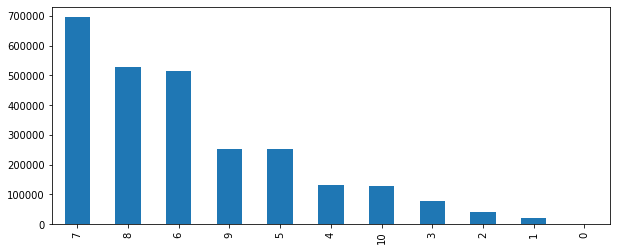

In [16]:
targets = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,4))
data.rating.value_counts().plot(kind='bar');

It is very unfortunate that the reviews are not equally distrubuted among all the rating labels. 
As it can be seen, rating of type 7 have more number of data than any other type. 

# **What happens when the data is unevenly distrubuted?**


*   The classification accuracy drops rapidly because of uneven distribution of features
*   Classifier will prefer the class with more values

This is how real world data is. Among all thiese conditions, we will fit different type of models and check wich performs better



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


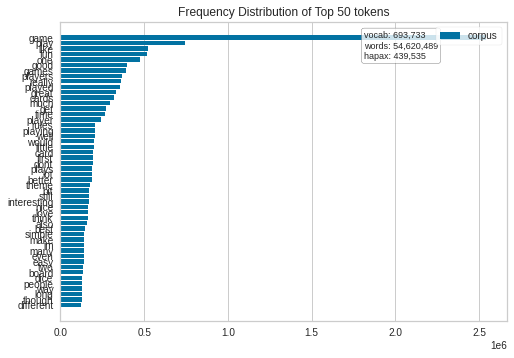

In [17]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(data['comment'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

In [ ]:
#splitting train and test data
x = data.comment
y = data.rating
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  stratify=y, 
                                                  random_state=40, 
                                                  test_size=0.3, shuffle=True)


# **Multinomial Naive Bayes**
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification where the data are typically represented as word vector counts.

In [19]:
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

printErrAcc(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

accuracy 0.3151074081890293
Mean Squared Error:  2.455591683336977
Mean Absolute Error:  1.113061983225645


Predicted,0,1,2,3,4,5,6,7,8,9,10,All
True,,,,,,,,,,,,
0,0,0,0,0,0,1,1,1,0,0,0,3
1,0,117,54,181,405,920,2411,1680,422,93,77,6360
2,1,14,128,218,586,1872,5726,2803,552,112,39,12051
3,0,13,35,225,600,3015,11604,6004,1166,165,54,22881
4,1,23,49,108,586,3988,20549,12102,2172,271,76,39925
5,0,26,37,82,419,4851,35558,28736,4903,580,189,75381
6,1,71,69,77,301,3412,55544,77922,14769,1375,441,153982
7,4,110,68,77,213,1568,38173,127424,36968,3177,952,208734
8,1,104,47,44,96,621,15157,84433,50955,5605,1337,158400


Naive Bayes gives us an accuracy of 31.5%. 
It is not a great number but considering our real world problems, this is not bad.

Our cross table gives more information on how the classifier worked.
As we can see, of total 208734 values in rating-7, correctly classified rows are 127424
for rating having fewer data, the numbers are also very low. 

# **Multinomial NB with TFIDF**
**TFIDF**:

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

**How is TFIDF computed?**

*  TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

  TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

*  IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

  IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

Ref(https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

In [20]:
nb_with_tf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb_with_tf.fit(x_train, y_train)

y_pred = nb_with_tf.predict(x_test)


printErrAcc(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

accuracy 0.2849517329751165
Mean Squared Error:  2.8622427896432194
Mean Absolute Error:  1.2280359446853197


Predicted,1,2,3,4,5,6,7,8,9,10,All
True,,,,,,,,,,,
0,0,0,0,0,0,0,3,0,0,0,3
1,7,0,8,21,61,1441,4661,157,3,1,6360
2,0,54,3,42,108,3242,8421,175,6,0,12051
3,0,0,14,39,203,5714,16568,333,10,0,22881
4,0,2,5,58,291,9043,29947,557,22,0,39925
5,0,0,6,15,456,13976,59568,1319,36,5,75381
6,0,0,0,12,253,16965,132749,3910,89,4,153982
7,0,0,0,16,117,7994,190248,10196,151,12,208734
8,0,0,0,2,45,2939,137853,17274,272,15,158400


Unfortunately, TFIDF did not work in out case. The accuracy for the above model is bad tha the previous NB model.

But, TFIDF on its own is a very promising concept. So i will continue to use TFIDF in the next classifiers I use.

# **Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Unfortunately due to RAM limits, I was unable to use bi-grams and tri-grams for constructing the model. Colab keeps crashing if i just use bi-grams. 
If there is a good RAM, I believe n-grams will give a very good accuracy boost.

In [ ]:
x, x_val, y, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.3)

In [22]:
hyperParam = [0.01,1,0.5,0.1]
sqArr = list()
absArr = list()
accur = list()
for i in hyperParam:
  logistic = Pipeline([('vect', CountVectorizer()), 
                    ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=i)),
                ])

  logistic.fit(x, y)

  y_pred = logistic.predict(x_val)
  print("alpha: ",i)
  printErrAcc(y_val, y_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


alpha:  0.01
accuracy 0.31183960399256944
Mean Squared Error:  2.5873171471434064
Mean Absolute Error:  1.1402327735142952


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


alpha:  1
accuracy 0.32535036078631013
Mean Squared Error:  2.365230923096642
Mean Absolute Error:  1.0814237925799155


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


alpha:  0.5
accuracy 0.32648227480417163
Mean Squared Error:  2.3459161733724
Mean Absolute Error:  1.0774214745933144


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


alpha:  0.1
accuracy 0.3251878850899664
Mean Squared Error:  2.388649086796322
Mean Absolute Error:  1.0866771734283636


In [23]:
logReg = Pipeline([('vect', CountVectorizer()), 
                    ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=0.5)),
                ])
logReg.fit(x_train, y_train)

y_pred = logReg.predict(x_test)
print("alpha: ",0.5)
printErrAcc(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


alpha:  0.5
accuracy 0.32588550624457396
Mean Squared Error:  2.3594127332948327
Mean Absolute Error:  1.0792163037530629


Predicted,1,2,3,4,5,6,7,8,9,10,All
True,,,,,,,,,,,
0,0,0,0,2,0,0,1,0,0,0,3
1,193,652,566,571,539,1466,1839,397,36,101,6360
2,78,797,995,1341,1505,3616,2930,603,90,96,12051
3,44,623,1091,2214,3197,8221,6058,1159,133,141,22881
4,43,465,859,2605,5450,15917,12032,2153,193,208,39925
5,45,364,664,2384,7574,30272,28613,4711,376,378,75381
6,48,230,421,1538,6033,49232,80315,14363,1010,792,153982
7,45,171,200,699,2555,32736,129652,38101,2949,1626,208734
8,37,99,105,299,1042,12300,82323,52811,6358,3026,158400


**Is our data suitable for Logistic Regression?**

Logistic regression is more suitable for Binary classification problems like cancer detection. We have multiple target values and that is one of the issue for logistic regression.
One of the assumptions of logistic regression is "The independent variables should be independent of each other. That is, the model should have little or no multicollinearity". This difficult to hold completley in real world data.

so, our data is partially suitable for logistic regression and our model gives good accuracy considering above points

# **Linear SVM**
Support vector machines (SVMs) are a set of supervised learning methods
advantages:
*   Effective in high dimensional spaces.
*   Still effective in cases where number of dimensions is greater than the number of samples.
*   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [24]:
linearSVM = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
linearSVM.fit(x_train, y_train)


y_pred = linearSVM.predict(x_test)
printErrAcc(y_test, y_pred)

accuracy 0.2636988248852876
Mean Squared Error:  3.625226992128412
Mean Absolute Error:  1.3747818537722079


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.17      0.21      0.19      6360
           2       0.11      0.10      0.11     12051
           3       0.11      0.08      0.09     22881
           4       0.13      0.10      0.11     39925
           5       0.18      0.18      0.18     75381
           6       0.28      0.26      0.27    153982
           7       0.33      0.40      0.36    208734
           8       0.29      0.26      0.28    158400
           9       0.19      0.17      0.18     75413
          10       0.21      0.23      0.22     38197

    accuracy                           0.26    791327
   macro avg       0.18      0.18      0.18    791327
weighted avg       0.26      0.26      0.26    791327



It is very shocking that a very good model like SVM have given low accuracy and large error. Looking for what might be the problem, I have found bellow points:
*  SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping. We have converted the rating into discrete values. otherwise they are continuous and overlapping.
*   As the support vector classifier works by putting data points, above and below the classifying hyper plane there is no probabilistic explanation for the classification.

In [26]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,7,8,9,10,All
True,,,,,,,,,,,
0,0,0,0,1,0,0,1,0,0,1,3
1,1348,728,456,549,870,699,892,383,213,222,6360
2,925,1260,1101,1428,2191,1937,1803,745,398,263,12051
3,914,1403,1803,2570,4570,4599,4120,1550,843,509,22881
4,840,1410,2181,3865,8038,9799,8324,3107,1564,797,39925
5,791,1582,2627,5166,13829,20573,19380,6794,3085,1554,75381
6,943,1861,3099,6518,18531,39795,52204,19416,7881,3734,153982
7,984,1673,2543,5665,15098,37387,83716,39391,15090,7187,208734
8,643,1042,1377,3195,8148,19746,55217,41803,17612,9617,158400


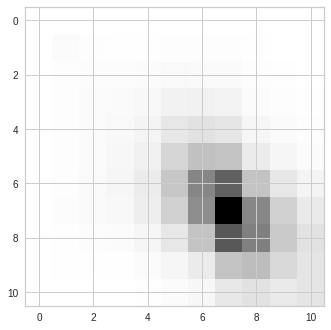

In [27]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

# **Hyperparameter tuning with Grid Search**
Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions

I have done grid search on Naive bayes and linear SVM. 
The accuracy has improved...!

In [ ]:

text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

gs_nb = GridSearchCV(text_clf, parameters, cv=5)
gs_nb = gs_nb.fit(x_train, y_train)



In [30]:
y_pred = gs_nb.predict(x_test)
printErrAcc(y_test, y_pred)

accuracy 0.31781046267851343
Mean Squared Error:  2.378909098261528
Mean Absolute Error:  1.097527318036665


In [ ]:
svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier()),])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

gs_svm = GridSearchCV(svm, parameters, cv=5)
gs_svm = gs_svm.fit(x_train, y_train)

In [32]:
y_pred = gs_svm.predict(x_test)
printErrAcc(y_test, y_pred)

accuracy 0.30834408531492036
Mean Squared Error:  2.738767917687631
Mean Absolute Error:  1.168721653627388


# **Stemming**

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

This is taking text cleaning a step ahead. 

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

In [ ]:
stemmed = Pipeline([('vect', stemmed_count_vect),('tfidf', TfidfTransformer()),
('mnb', MultinomialNB(fit_prior=False)),])

stemmed = stemmed.fit(x_train, y_train)
y_pred = stemmed.predict(x_test)

printErrAcc(y_test, y_pred)

accuracy 0.2973280359092563
Mean Squared Error:  3.5736496117918235
Mean Absolute Error:  1.2743653706174936


In [ ]:
stemmed = Pipeline([('vect', stemmed_count_vect),('tfidf', TfidfTransformer()),
('mnb', SGDClassifier()),])

stemmed = stemmed.fit(x_train, y_train)
y_pred = stemmed.predict(x_test)

printErrAcc(y_test, y_pred)

accuracy 0.2643606696591047
Mean Squared Error:  3.640573820211088
Mean Absolute Error:  1.3775551983501153


In our case, stemming is not showing any good results.

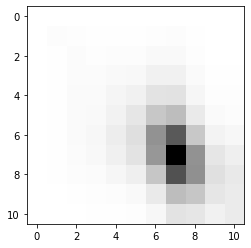

In [ ]:
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

# **Word2Vec using gensim**

The idea behind Word2vec is rather simple: we want to use the surrounding words to represent the target words with a Neural Network whose hidden layer encodes the word representation.

**Note:**

I haven't used entire data in this method because of RAM restrictions. 

In [33]:
!pip install gensim
import gensim

In [34]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
wv = KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


I have tried writing the below function based on BOW concept.
Re-Training the model.BOW based approaches that includes averaging, summation, weighted addition. The common way is to average the two word vectors. Therefore, we will follow the most common way.

In [ ]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(data, test_size=0.3, random_state = 42)
train_data = train[:25000]
test_data = test[:7500]

test_tokenized = test_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values
train_tokenized = train_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values



In [37]:
print(len(test_tokenized))
print(len(train_tokenized))
yTrain_data = train_data['rating']
yTest_data = test_data['rating']

7500
25000


In [ ]:
import logging
import warnings
warnings.filterwarnings("ignore")
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [39]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, yTrain_data)
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, yTest_data))

accuracy 0.2776


# **Voting Ensemble**

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses

In our case, voting ensemble have given us a good accuracy when compared to linear SVM and nb with tifidf individually.

In [ ]:
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
estimators.append(('logistic', logReg))
estimators.append(('naivebayes', nb))
estimators.append(('svm', linearSVM))
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.3154694819703437


# **Web Server and deployment of the model**

Step1: Choosing the right model. I have choosen to do ensembling the best 3 models with highest accuracy. 

Step2 : Deployment. Having selected the right model, I have converted my phython/jupyter notebook to JOBLIL format for deployment of AWS.

Step3: Train the model with all the data available.

Step4: Set up Front end. My front end is written in jQuery and AJAX that calls the model.

Step5: Sending the input to trained model. 

Step6: Displaying output. 

Link to page: "http://ldeepika.uta.cloud/MyPortfolio/predict.html"

![Example-bad review](https://drive.google.com/open?id=1uvvZG7nPPnYOAiR3dLJRVS9X85Qf3bf7)

![Example-good review](https://drive.google.com/open?id=1Tyt68sM0tPi9W9Lapjf39-SSKzh4cILq)
